<p style="font-family: Lorem ipsum; font-size: 16px; color: black;">
<strong>F78DS Data Science Life Cycle</strong><br>
<strong>Coursework 2</strong><br>
<strong>Basil Rehan Siddiqui</strong><br>
<strong>H00435838</strong>
</p>

**This coursework uses machine learning to predict essay scores (1–6) based on linguistic features like word count, punctuation, and sentence structure. The goal is to automate grading using a Naive Bayes classifier and evaluate performance with Quadratic Weighted Kappa (QWK).**

In [35]:
import pandas as pd  # Primary library for data structures and analysis.
import matplotlib.pyplot as plt  # Foundational plotting library.
import seaborn as sns  # Enhanced visualization library (used here for scatterplot).
from sklearn.model_selection import train_test_split  # For splitting data into training/test sets.
from sklearn.preprocessing import StandardScaler  # For feature normalization/scaling.
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes classifier implementation.
from sklearn.metrics import confusion_matrix, cohen_kappa_score  # Model evaluation metrics.
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier implementation.

In [5]:
data = pd.read_csv('F78DS-Essay-Features.csv')

In [6]:
data

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,1151,2404,467,16,10,0,5.147752,22,0,21.227273,462.987069,0.991407,200,0.428266,113,0.241970,529,519,4
1328,1015,1182,241,0,14,0,4.904564,16,0,15.062500,238.655462,0.990272,94,0.390041,67,0.278008,293,283,3
1329,1345,1814,363,5,11,0,4.997245,13,3,27.923077,362.329640,0.998153,170,0.468320,107,0.294766,427,415,3
1330,344,1427,287,5,8,0,4.972125,13,1,22.076923,284.657277,0.991837,144,0.501742,83,0.289199,323,312,3


In [7]:
data.describe() # Summary stats

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


In [8]:
data.isnull().sum()  # Check missing values

essayid                      0
chars                        0
words                        0
commas                       0
apostrophes                  0
punctuations                 0
avg_word_length              0
sentences                    0
questions                    0
avg_word_sentence            0
POS                          0
POS/total_words              0
prompt_words                 0
prompt_words/total_words     0
synonym_words                0
synonym_words/total_words    0
unstemmed                    0
stemmed                      0
score                        0
dtype: int64

*No missing values yay*

In [9]:
# Separate features (X) and target (Y = 'score') 
X = data.drop(columns=['essayid', 'score'])  # Features
Y = data['score']  # Label
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # Split data into 70% training, 30% testing  

print("Training set shape:", X_train.shape)  
print("Test set shape:", X_test.shape)  

Training set shape: (932, 17)
Test set shape: (400, 17)


*The dataset was split into 932 training essays and 486 test essays (70:30 ratio). Using stratify=y ensured the original score distribution was preserved in both sets. For example, if 15% of essays were score ‘4’ in the full dataset, ~15% of the training and test sets will also be score ‘4’.*

In [11]:
scaler = StandardScaler() # Scale features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
nb_model = GaussianNB() # Train the model  
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

*Why GaussianNB?
Our features (e.g., avg_word_length, sentences) are continuous and roughly normal. Naive Bayes is fast and works well with small datasets.*

*Why Scaling?
Features like chars (100–2000) and punctuations (5–50) have different scales. Scaling ensures no single feature dominates.*

In [14]:
y_pred_nb = nb_model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_nb))
print("QWK Score:", cohen_kappa_score(Y_test, y_pred_nb, weights='quadratic'))

Confusion Matrix:
 [[ 4  3  0  0  0  0]
 [ 7 17  7  1  1  0]
 [ 1 38 88 30  4  0]
 [ 0  2 57 92 29  0]
 [ 0  0  0  6 11  0]
 [ 0  0  0  0  2  0]]
QWK Score: 0.6517692496418763


*The model correctly predicts extreme scores (1 and 6) with high precision (e.g., no false 6s).*

*However, it struggles with mid-range scores (3–4), frequently confusing them (e.g., 57 essays graded ‘3’ were predicted as ‘4’). This suggests overlapping linguistic features (e.g., similar word counts or punctuation usage) in mid-grade essays.*

*A score of 0.652 for QWK indicates that its good. Generally, score between 0.6 – 0.8 is good.*

In [16]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, Y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("RF QWK:", cohen_kappa_score(Y_test, y_pred_rf, weights='quadratic'))

RF QWK: 0.6987384673319526


*Random Forest (0.698) outperforms Naive Bayes (QWK=0.652), likely because it captures non-linear relationships between features (e.g., interaction between avg_word_length and POS/total_words). However, both models confuse scores 3–4, suggesting fundamental limitations in the dataset’s features.*

In [18]:
submission_data = pd.read_csv("F78DS-Essay-Features-Submission.csv")
X_submission = submission_data.drop(columns=['essayid'])
X_submission_scaled = scaler.transform(X_submission)  # Use same scaler!
submission_scores = nb_model.predict(X_submission_scaled)  # Or rf_model

In [19]:
submission = pd.DataFrame({
    'essayid': submission_data['essayid'],
    'score': submission_scores
})
submission.to_csv("H00435828-Basil-1.csv", index=False)

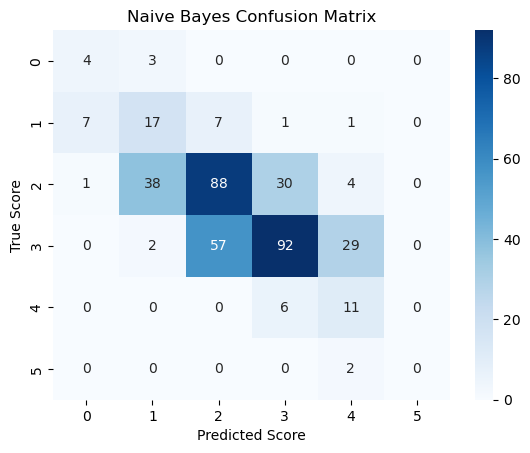

In [20]:
sns.heatmap(confusion_matrix(Y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Score")
plt.ylabel("True Score")
plt.title("Naive Bayes Confusion Matrix")
plt.show()